# Q1

In [ ]:
import math

def binomial_probability(n, p, k):
    # Calculate the binomial coefficient (n choose k)
    binomial_coefficient = math.comb(n, k)

    # Calculate the probability P(X = k) using the binomial distribution formula
    probability = binomial_coefficient * (p ** k) * ((1 - p) ** (n - k))

    return probability

# Get user input for n, p, and k
# n = int(input("Enter the number of variables (n): "))
p = 0.5
n = 5
result = 0

for k in range(3 , 6):
  print(f'k : {k}')
  result += binomial_probability(n, p, k)

print(f'result  : {result}')

k : 3
k : 4
k : 5
result  : 0.5


In [ ]:
p = 0.7
n = 100
result = 0

for k in range(50 , 101):
  # print(f'k : {k}' , end = ',')
  result += binomial_probability(n, p, k)

print(f'result  : {result}')

result  : 0.9999909653138044


# Q2 - Section(a)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.97


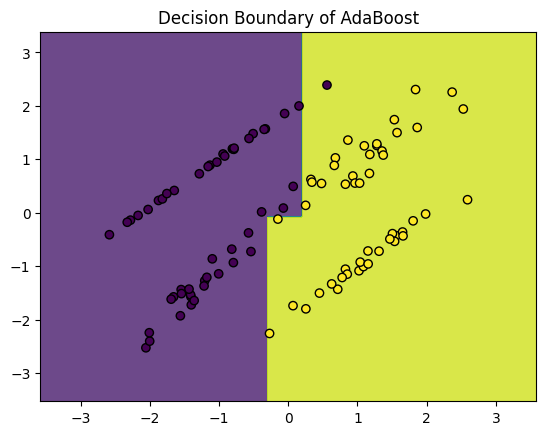

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada.fit(X_train, y_train)


y_pred = ada.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary of AdaBoost')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.00%


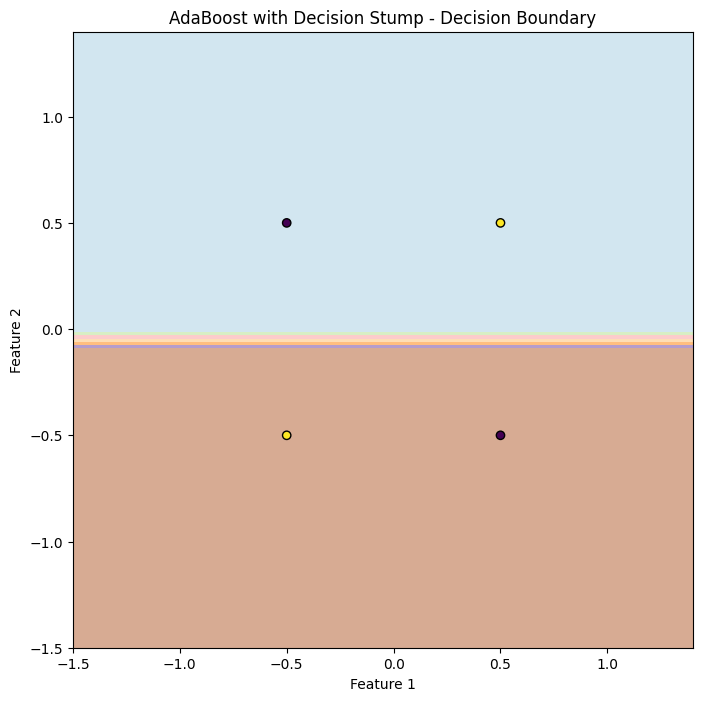

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Prepare the data
X = np.array([[-0.5, 0.5], [0.5, -0.5], [-0.5, -0.5], [0.5, 0.5]])
y = np.array([0, 0, 1, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Decision stump
decision_stump = DecisionTreeClassifier(max_depth=1)

# AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

# Predict
y_pred = ada_boost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundaries
plt.figure(figsize=(8, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("AdaBoost with Decision Stump - Decision Boundary")
plt.show()


# Q2 - Section(b)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 75.00%
Estimator Weights (alphas): [1. 0.]
Estimator Errors: [0. 1.]


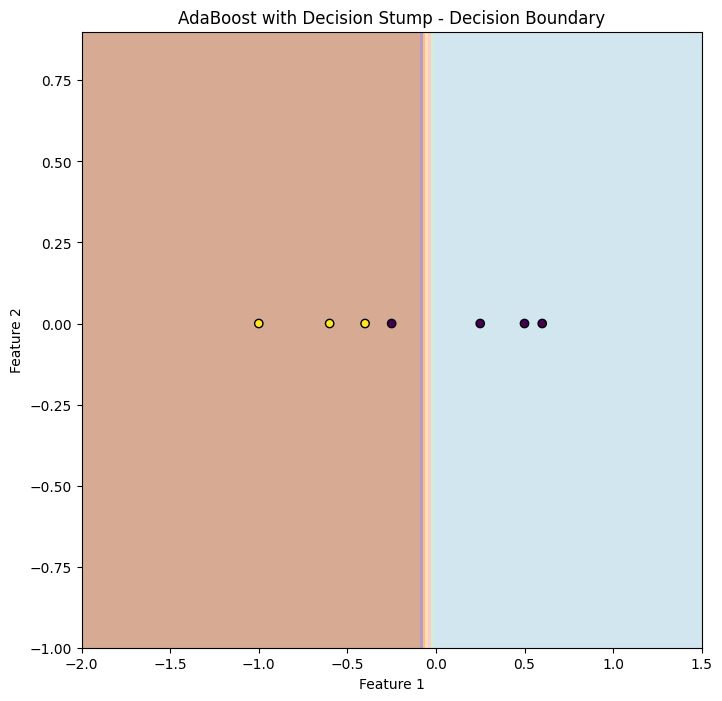

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = np.array([[0.5, 0], [0.25, 0], [-0.25, 0], [-1, 0], [-0.6, 0], [-0.4, 0], [0.6, 0]])
y = np.array([0, 0, 0, 1, 1, 1, 1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


decision_stump = DecisionTreeClassifier(max_depth=1)

ada_boost = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=2, random_state=42)
ada_boost.fit(X_train, y_train)


y_pred = ada_boost.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
alphas = ada_boost.estimator_weights_
errors = ada_boost.estimator_errors_
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Estimator Weights (alphas): {alphas}")
print(f"Estimator Errors: {errors}")


plt.figure(figsize=(8, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("AdaBoost with Decision Stump - Decision Boundary")
plt.show()

# Q6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path6 = '/content/drive/MyDrive/ML_HW3/prison_dataset.csv'

df6 = pd.read_csv(file_path6)

print(df6.columns)

# df6.head()

Mounted at /content/drive
Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype',
       'Main Supervising District', 'Release Type',
       'Part of Target Population', 'Recidivism - Return to Prison numeric'],
      dtype='object')


In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.DataFrame(df6)

def entropy(s):
    counts = np.bincount(s)
    probabilities = counts / len(s)
    return -sum(p * np.log2(p) for p in probabilities if p)

def information_gain(parent_node, child_nodes):
    total_child_instances = sum(len(node) for node in child_nodes)
    child_entropy = sum((len(node) / total_child_instances) * entropy(node) for node in child_nodes)
    return entropy(parent_node) - child_entropy

def id3(df, target_column, max_depth):
    if max_depth == 0 or len(df.columns) == 1:
        return Counter(df[target_column]).most_common(1)[0][0]

    best_feature = max(df.columns[:-1], key=lambda feature: information_gain(df[target_column], [df[df[feature] == value][target_column] for value in df[feature].unique()]))

    tree = {best_feature: {}}

    for value in df[best_feature].unique():
        subtree = id3(df[df[best_feature] == value].drop(best_feature, axis=1), target_column, max_depth - 1)
        tree[best_feature][value] = subtree

    return tree


train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]


tree = id3(train_data, target_column='Recidivism - Return to Prison numeric', max_depth=3)

def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    value = sample[feature]
    subtree = tree[feature][value]
    return predict(subtree, sample)

predictions = [predict(tree, sample) for _, sample in test_data.iterrows()]

accuracy = accuracy_score(test_data['Recidivism - Return to Prison numeric'], predictions)
print('Accuracy:', accuracy)

conf_matrix = confusion_matrix(test_data['Recidivism - Return to Prison numeric'], predictions)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(test_data['Recidivism - Return to Prison numeric'], predictions)
print('Classification Report:')
print(class_report)

Accuracy: 0.37341977309562396
Confusion Matrix:
[[ 870 1850]
 [  83  282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.32      0.47      2720
           1       0.13      0.77      0.23       365

    accuracy                           0.37      3085
   macro avg       0.52      0.55      0.35      3085
weighted avg       0.82      0.37      0.44      3085

